#### Spacy Tokenization

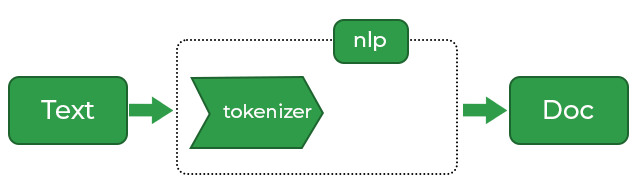

In [1]:
import spacy

In [2]:
nlp=spacy.blank('en')
doc=nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate")

In [3]:
for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate


In [4]:
doc[0]

Dr.

In [5]:
doc[-1]

plate

In [6]:
type(nlp)

spacy.lang.en.English

In [7]:
type(doc)

spacy.tokens.doc.Doc

In [8]:
doc[1:5]

Strange loves pav bhaji

In [9]:
doc=nlp("Tony gave two $ to Peter.")

In [10]:
token0=doc[0]

In [11]:
token0

Tony

In [12]:
type(token0)

spacy.tokens.token.Token

In [13]:
token0.like_num

False

In [14]:
token3=doc[3]

In [15]:
token3.text

'$'

In [16]:
token3.is_currency

True

In [17]:
for token in doc:
    print

In [18]:
with open("students.txt") as f:
    text=f.readlines()

In [19]:
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [20]:
text=" ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [21]:
doc=nlp(text)
emails=[]
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

In [22]:
doc=nlp('gimme double cheese extra large healthy pizza')
tokens=[token.text for token in doc]

In [23]:
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [24]:
from spacy.symbols import ORTH
nlp.tokenizer.add_special_case("gimme",[
    {ORTH:'gim'},
    {ORTH: 'me'}   
])
doc =nlp("gimme double cheese extra large healthy pizza")
tokens=[token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

## SPacy Pipe Line

#### spacy Blank pipeline

In [25]:
nlp = spacy.blank('en')
doc = nlp("Capatain america ate 100$ of samosa. The he said I can do this all day")

for token in doc:
    print(token)

Capatain
america
ate
100
$
of
samosa
.
The
he
said
I
can
do
this
all
day


* even blank pipeline also we will get word tokenization

In [26]:
nlp=spacy.load("en_core_web_sm")

In [27]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x25af1707be0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x25af1707e80>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x25af16e92e0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x25af1744580>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x25af17447c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x25af16e9190>)]

In [28]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [29]:
#Using the spaCy pipeline, we can perform part-of-speech tagging on a given sentence.
doc = nlp("Capatain america ate 100$ of samosa. The he said I can do this all day")

for token in doc:
    print(token, "|", token.pos_, "|",token.lemma_)

Capatain | PROPN | Capatain
america | PROPN | america
ate | VERB | eat
100 | NUM | 100
$ | NUM | $
of | ADP | of
samosa | NOUN | samosa
. | PUNCT | .
The | DET | the
he | PRON | he
said | VERB | say
I | PRON | I
can | AUX | can
do | VERB | do
this | PRON | this
all | DET | all
day | NOUN | day


#### NER(Named Entity Recognition)

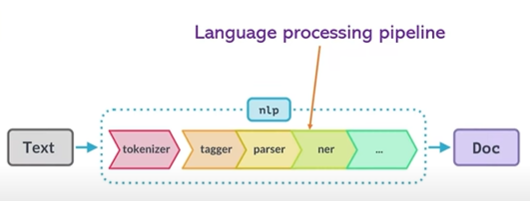

In [30]:

doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
    print(ent.text,"|", ent.label_, "|",spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


* Named Entity Recognition (NER) is an NLP technique used to find the entities like organization, an individual's, name, location, a prduct, etc in the given raw text.

In [31]:
from spacy import displacy
displacy.render(doc, style='ent')

 * displacy module from the spaCy library used to visualize the named entities. 

### blank pipeline

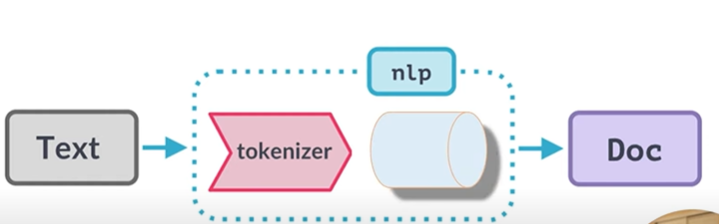

In [32]:
nlp=spacy.blank("en")
doc=nlp("captain america ate 100$ of samosa. Then he said i can do this all day")

for token in doc:
    print(token, "|",token.pos_, "|", token.lemma_)

captain |  | 
america |  | 
ate |  | 
100 |  | 
$ |  | 
of |  | 
samosa |  | 
. |  | 
Then |  | 
he |  | 
said |  | 
i |  | 
can |  | 
do |  | 
this |  | 
all |  | 
day |  | 


* blank pipeline will not provide any results; it's essentially devoid of any processing or analysis.
* blank pipeline will provide tokenization only.